In [1]:
import pandas as pd
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
data.head()

C:\Users\Max\AppData\Local\Temp\ipykernel_11656\2433985387.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")


,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220.0,3074.0,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358.0,7021.0,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309.0,7021.0,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431.0,26030.0,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080.0,4134.0,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


## Exercise 1

In [12]:
#Number of crimes
crime_num = len(data)
print("Number of crimes: ", crime_num, "\n")
#Number of categories
category_list = data["Category"].unique() 
print("List of categories: ", category_list)
print("Number of categories: ", len(category_list), "\n")
#Number of crimes in each category
print("Number of crimes in each category:")
print(data["Category"].value_counts())

Number of crimes:  1662148 

List of categories:  ['ROBBERY' 'VEHICLE THEFT' 'ARSON' 'ASSAULT' 'TRESPASS' 'BURGLARY'
 'LARCENY/THEFT' 'WARRANTS' 'OTHER OFFENSES' 'DRUG/NARCOTIC'
 'SUSPICIOUS OCC' 'LIQUOR LAWS' 'VANDALISM' 'WEAPON LAWS' 'NON-CRIMINAL'
 'MISSING PERSON' 'FRAUD' 'SEX OFFENSES, FORCIBLE' 'SECONDARY CODES'
 'DISORDERLY CONDUCT' 'RECOVERED VEHICLE' 'KIDNAPPING'
 'FORGERY/COUNTERFEITING' 'PROSTITUTION' 'DRUNKENNESS' 'BAD CHECKS'
 'DRIVING UNDER THE INFLUENCE' 'LOITERING' 'STOLEN PROPERTY' 'SUICIDE'
 'BRIBERY' 'EXTORTION' 'EMBEZZLEMENT' 'GAMBLING' 'PORNOGRAPHY/OBSCENE MAT'
 'SEX OFFENSES, NON FORCIBLE' 'TREA' nan]
Number of categories:  38 

Number of crimes in each category:
LARCENY/THEFT                  371283
OTHER OFFENSES                 236691
NON-CRIMINAL                   185262
ASSAULT                        129748
VEHICLE THEFT                   98771
DRUG/NARCOTIC                   92305
VANDALISM                       89001
WARRANTS                        78388
BU

## Exercise 2

In [15]:
category_counts = data["Category"].value_counts()
print("Most frequent crime: ", category_counts.index[0])

print("Least frequent crime: ", category_counts.index[-1])


Most frequent crime:  LARCENY/THEFT
Least frequent crime:  TREA


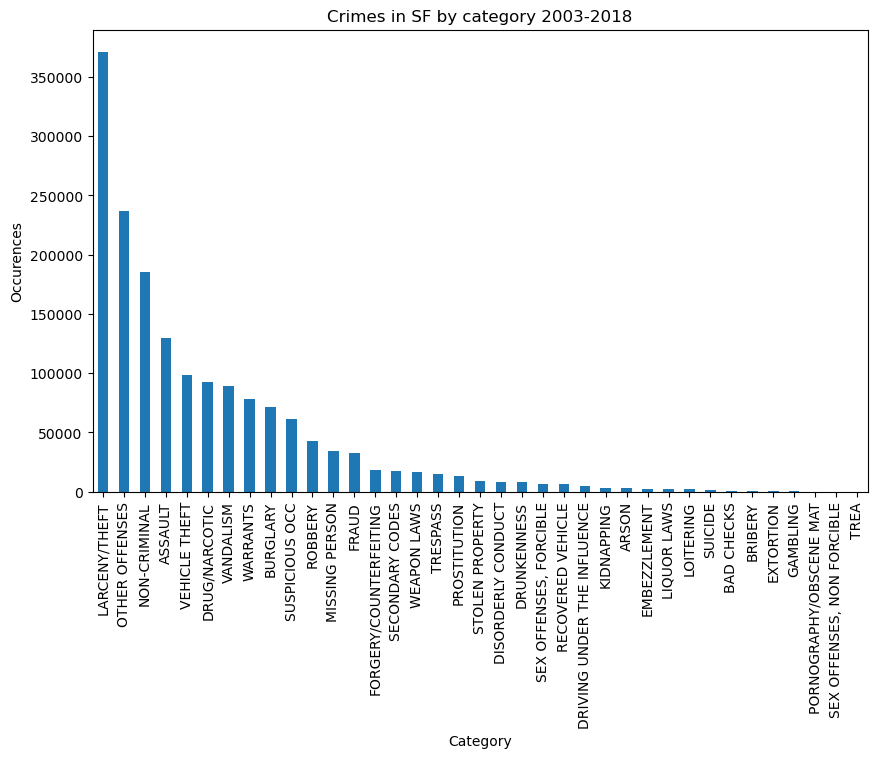

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
category_counts.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Occurences")
plt.title("Crimes in SF by category 2003-2018")
plt.show()

## Exercise 3

Year with most crimes:  2014.0 

Year with least crimes:  2017.0 



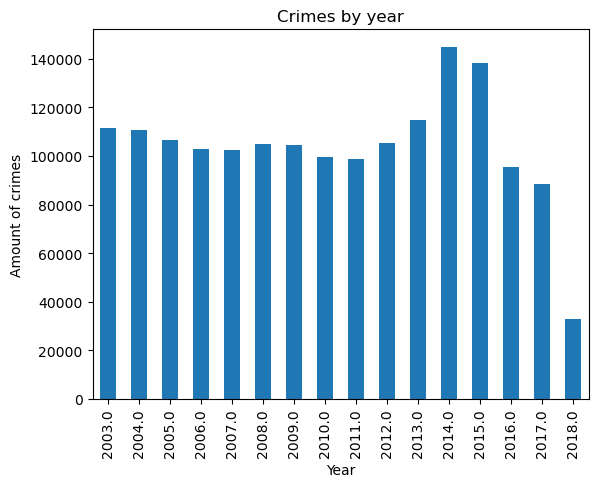

In [35]:
data["Date"] = pd.to_datetime(data["Date"])
year_counts = data["Date"].dt.year.value_counts()
print("Year with most crimes: ", year_counts.index[0],"\n")
#Since 2018 is only until may, it should always be the year with the least crimes,
#so we check the last "full" year, which is the second to last item
print("Year with least crimes: ", year_counts.index[-2], "\n")

sorted_year_count = year_counts.sort_index()
plt.figure()
sorted_year_count.plot(kind="bar")
plt.title("Crimes by year")
plt.xlabel("Year")
plt.ylabel("Amount of crimes")
plt.show()


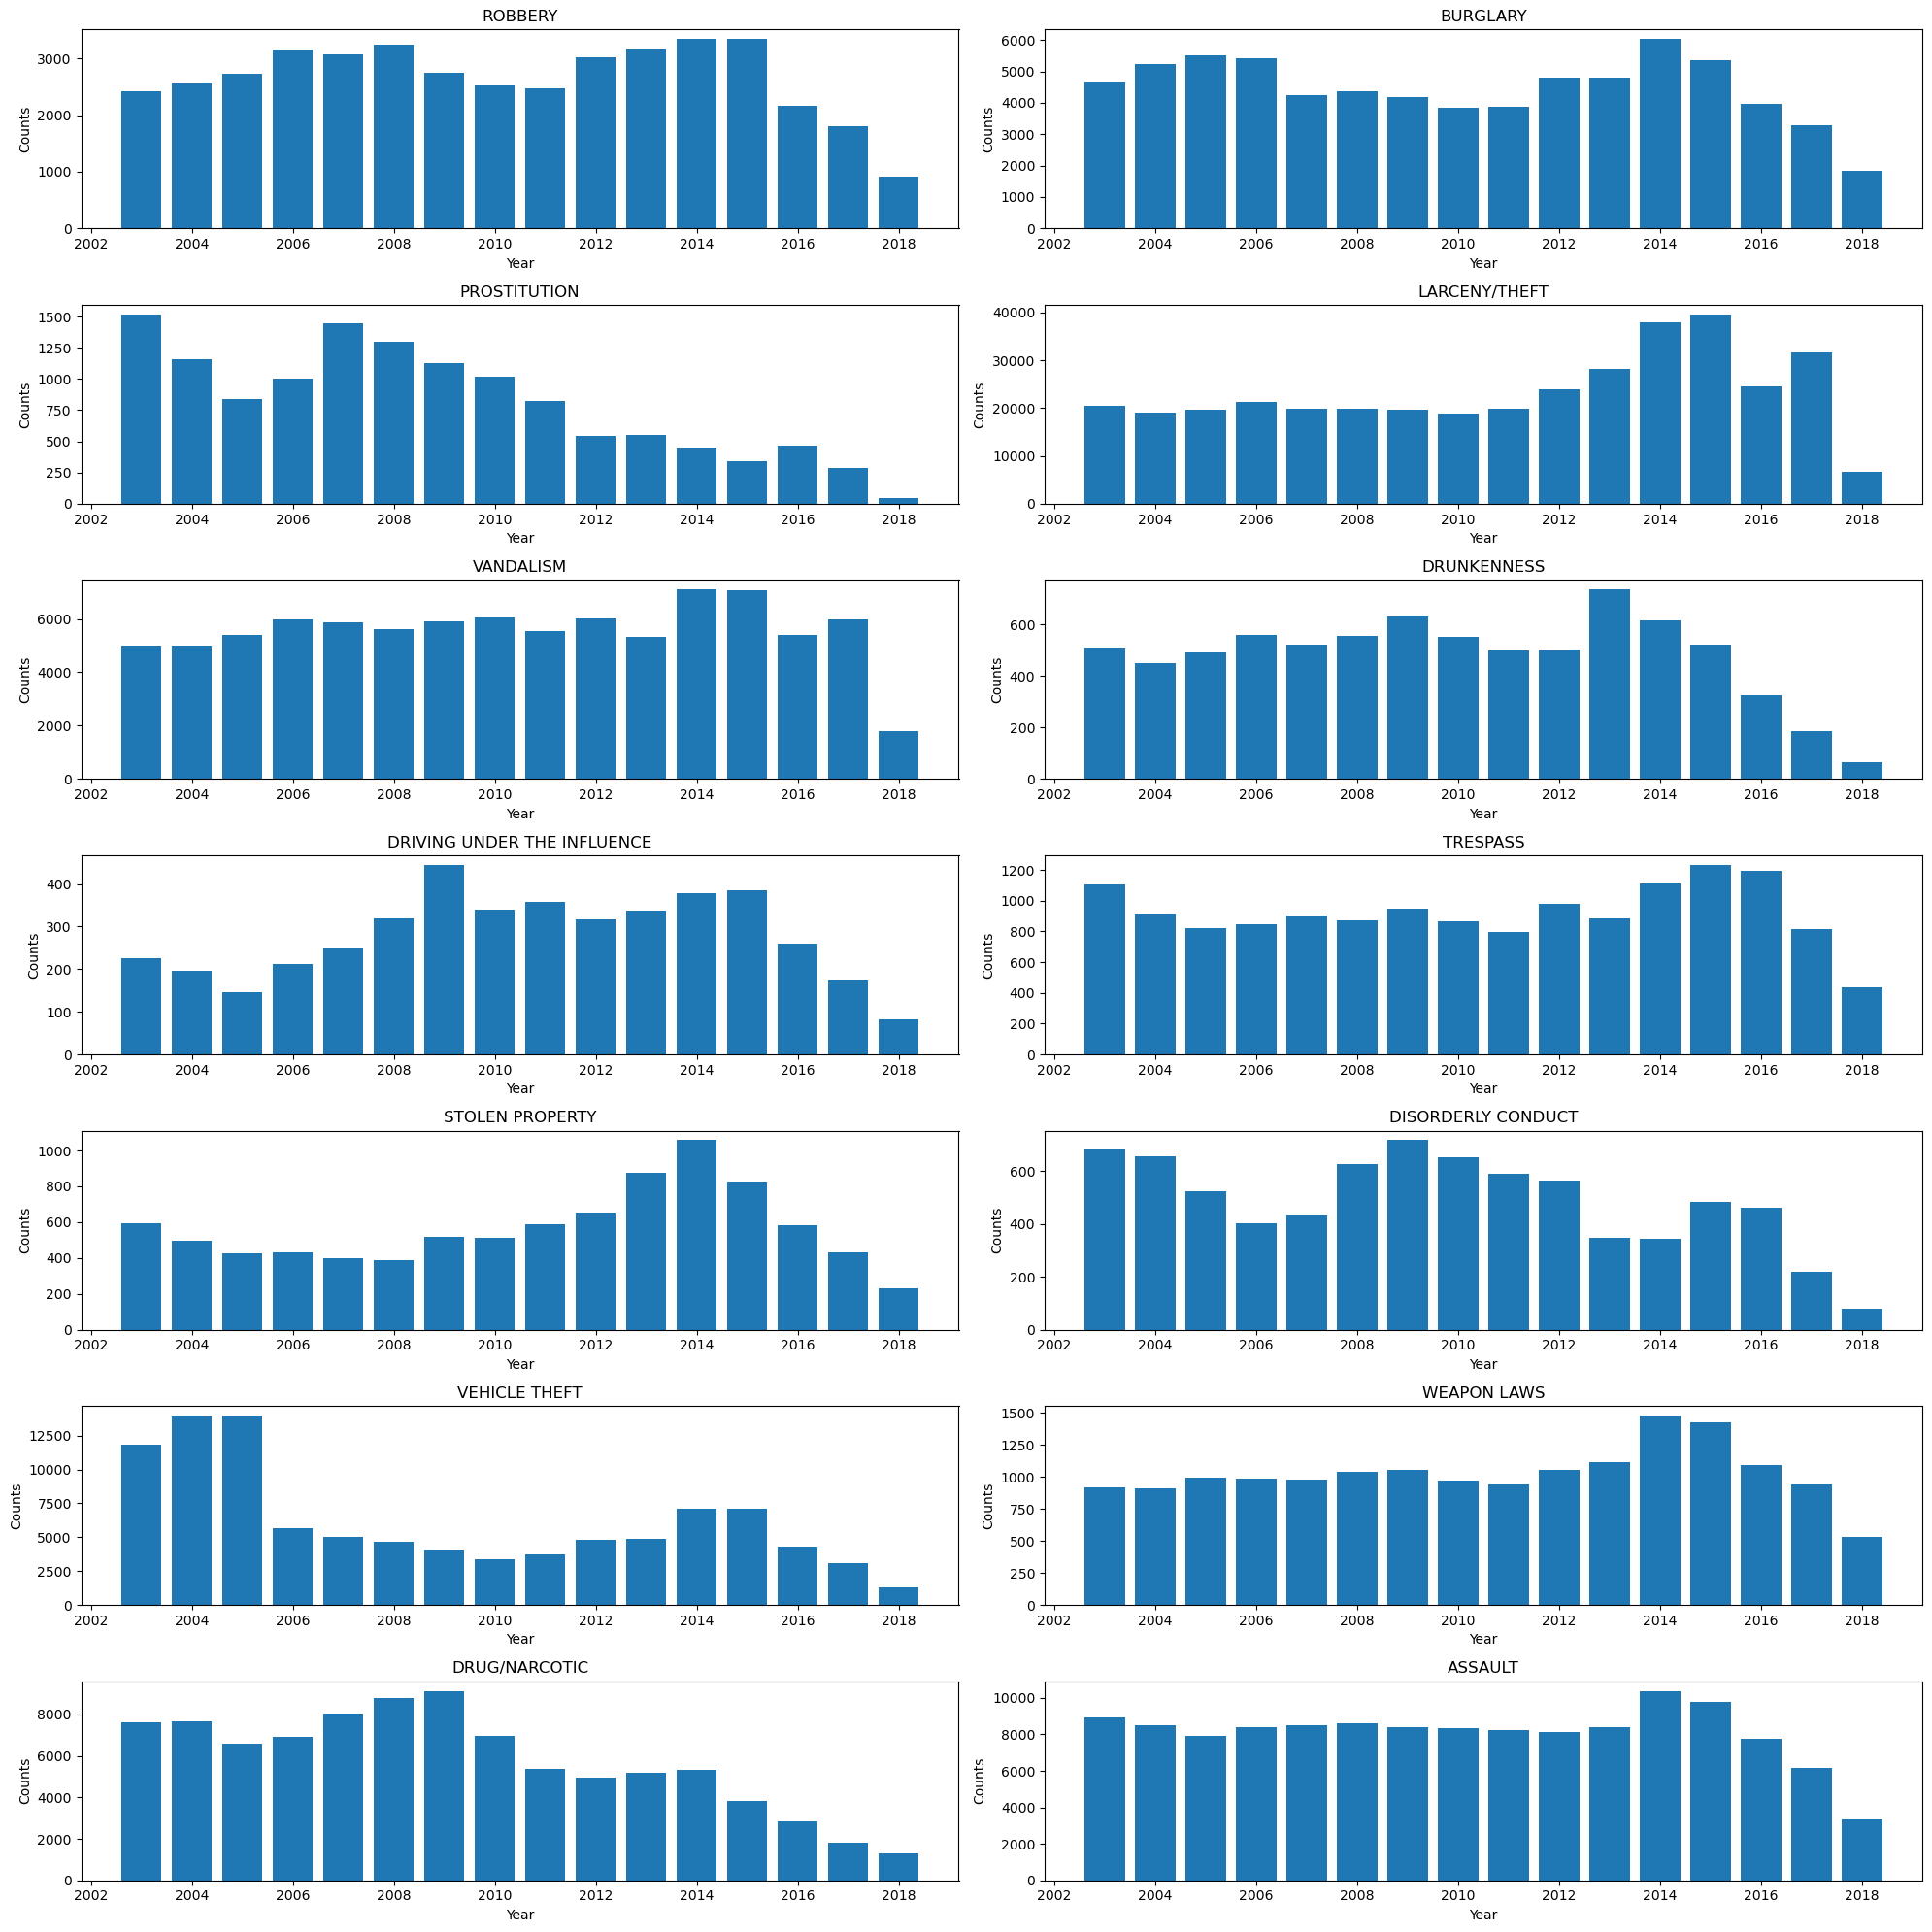

In [43]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

nrows = 7
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))
axes = axes.flatten()

for i,crime in enumerate(focuscrimes):
    crime_data = data[data["Category"] == crime]
    crime_year_counts = crime_data["Date"].dt.year.value_counts().sort_index()
    
    axes[i].bar(crime_year_counts.index,crime_year_counts.values)
    axes[i].set_title(crime)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Counts")
    
    
    #plt.figure(figsize=(3,1))
    #crime_year_counts.plot(kind = "bar")
    #plt.title(crime)
    #plt.xlabel("Year")
    #plt.ylabel("Counts")
    #plt.show()

plt.tight_layout()
plt.show()

Interesting trends:
1. Crime overall goes down from 2014/2015 and onwards. 
2. Stolen property went up in the beginning of the 2010s, peaking in 2014, and then went down after. 
3. Drug/Narcotic crimes have been going (mostly) down since 2009